# Seminar 2

## warmup exercise

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

In [ ]:
#example
arr = [1,2,3,4,5]
# target is 3
# indices are 0,1

In [2]:
import numpy as np

# numpy recap

In [3]:
# Create a simple array of values from 0 to 15
array = np.arange(16)

# Using the same object, subset only odd values - make a new object
odd_arr = array[array % 2 == 1].copy()

# Using the original object, subset only even values - make a new object
even_arr = array[array % 2 == 0].copy()

# Create a matrix with 2 rows with odd values in first row
    # Do you need to make any adjustments?
matrix = np.stack([odd_arr, even_arr])    

# what is the shape of the matrix?
# print(matrix.shape);

# what is the sum of the second column?
    # slicing / subsetting
matrix[:,1].sum()


# sum the first, third and fith column
matrix[:,(0,2,4)].sum(axis=1);
#iterables - [], (1,2) tuple 

# multiply the matrix with itself - create 8 x 8 resulting matrix
    #A, B, A-> m x n, B-> n x o => m x o

large_matrix = matrix.T.dot(matrix)

# what is largest elemtn of the matrix? On what index (position) ?
large_matrix.max()

# normalize this matrix (subract mean and divide by sd)
norm_matrix = (large_matrix - large_matrix.mean())/(large_matrix.std())

# make this 8x8 matrix into a single vector - save this object! 
flat_vec = large_matrix.flatten()

# check if the resulting vector is monotonous
    # write a function that returs true of false
    # is it goin up always?
        # look at 1st, see if 2nd is higher
        # 2dn, if 3rd higher
def is_monotonous(flat_vec):
    return all(np.diff(flat_vec) >= 0) or all(np.diff(flat_vec) <= 0)
# print(is_monotonous(flat_vec))

# how many items is smaller than 100?
flat_vec[flat_vec<100].shape

# replace the largest value with its double
flat_vec[np.argmax(flat_vec)] = -1 

# simulate data from normal distribution with those mean/sd parameters
sim_array = np.random.normal(flat_vec.mean(), flat_vec.std(), 100)


# Back to the long vector - replace all values which are less than 50 with -1
flat_vec[flat_vec<50] = -1

# count exactly how many -1s are there

(flat_vec == -1).sum()
# sort the array
    # check if it is monotonous with your function
    # in a separate cell, measure how long the execution takes
    
    
    
# Bonus task:
# Create a 2d array of size 10x10 with 1 on the border and 0 inside





24

In [4]:
%%timeit

is_monotonous(np.sort(flat_vec))

13.3 µs ± 506 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Pandas - Kaggle houses dataset

In [ ]:
# lets try some real world problem
# It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

# Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. 
# But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

# With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

# data downloadable from https://soulution-public.s3.amazonaws.com/pythonies/house-prices-advanced-regression-techniques.zip

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


%matplotlib inline
#https://seaborn.pydata.org/introduction.html

In [23]:
#load the train data and print columns
df_train = pd.read_csv('train.csv')
print(df_train.head())
# describe the target variable SalePrice
print(df_train['SalePrice'].describe())




   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [24]:
# check skewness and kurtosis of SalePrice - is it normally distributed?
   # normal dist is 0, 0 
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


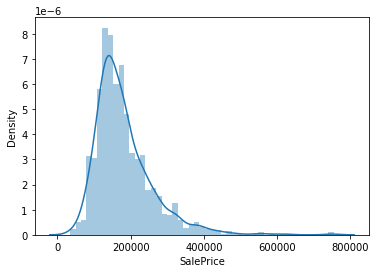

In [25]:
# create distribution plot of the sale price - comment on it

sns.distplot(df_train['SalePrice']); #fit=stats.norm


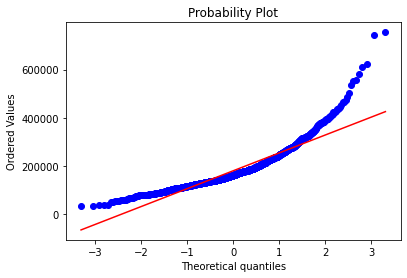

In [26]:
#create q-q plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)


In [ ]:
# GrLivArea: Above grade (ground) living area square feet
# TotalBsmtSF: Total square feet of basement area
# YearBuilt: Original construction date
# OverallQual: Overall material and finish quality

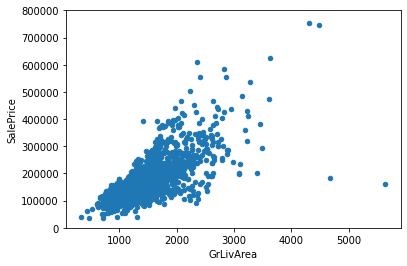

In [31]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = df_train[['SalePrice','GrLivArea']]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#scatter plot totalbsmtsf/saleprice

#box plot overallqual/saleprice

# what is the time dynamics of Sale price>

# create correlation matrix of all variables - seaborn heatmap

# find the variables most correlated with SalePrice 

# for important variables cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# see if we can create a plot of relationship between all the variables


In [ ]:
# Lets have a look at missing data
# how many missing data has each column?
# what is the percentage? 

# how would you handle this?

# is this dataset prepared for the submission?

#homework; try to make a submission

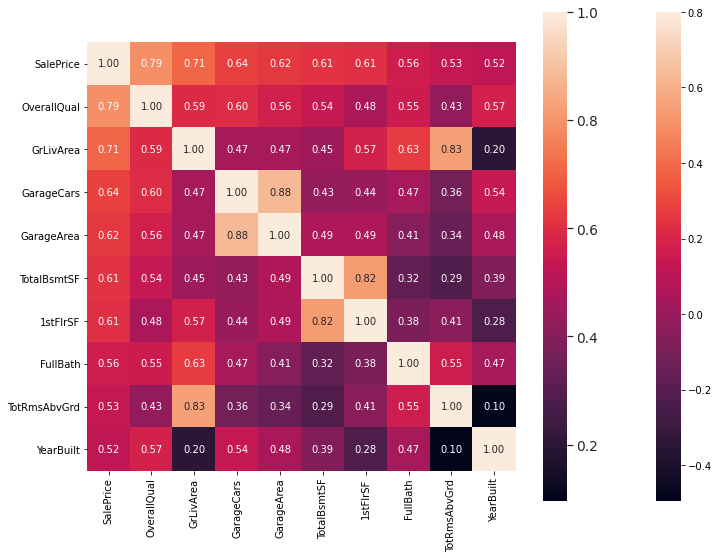

In [34]:
#saleprice correlation matrix
#box plot overallqual/saleprice
#saleprice correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


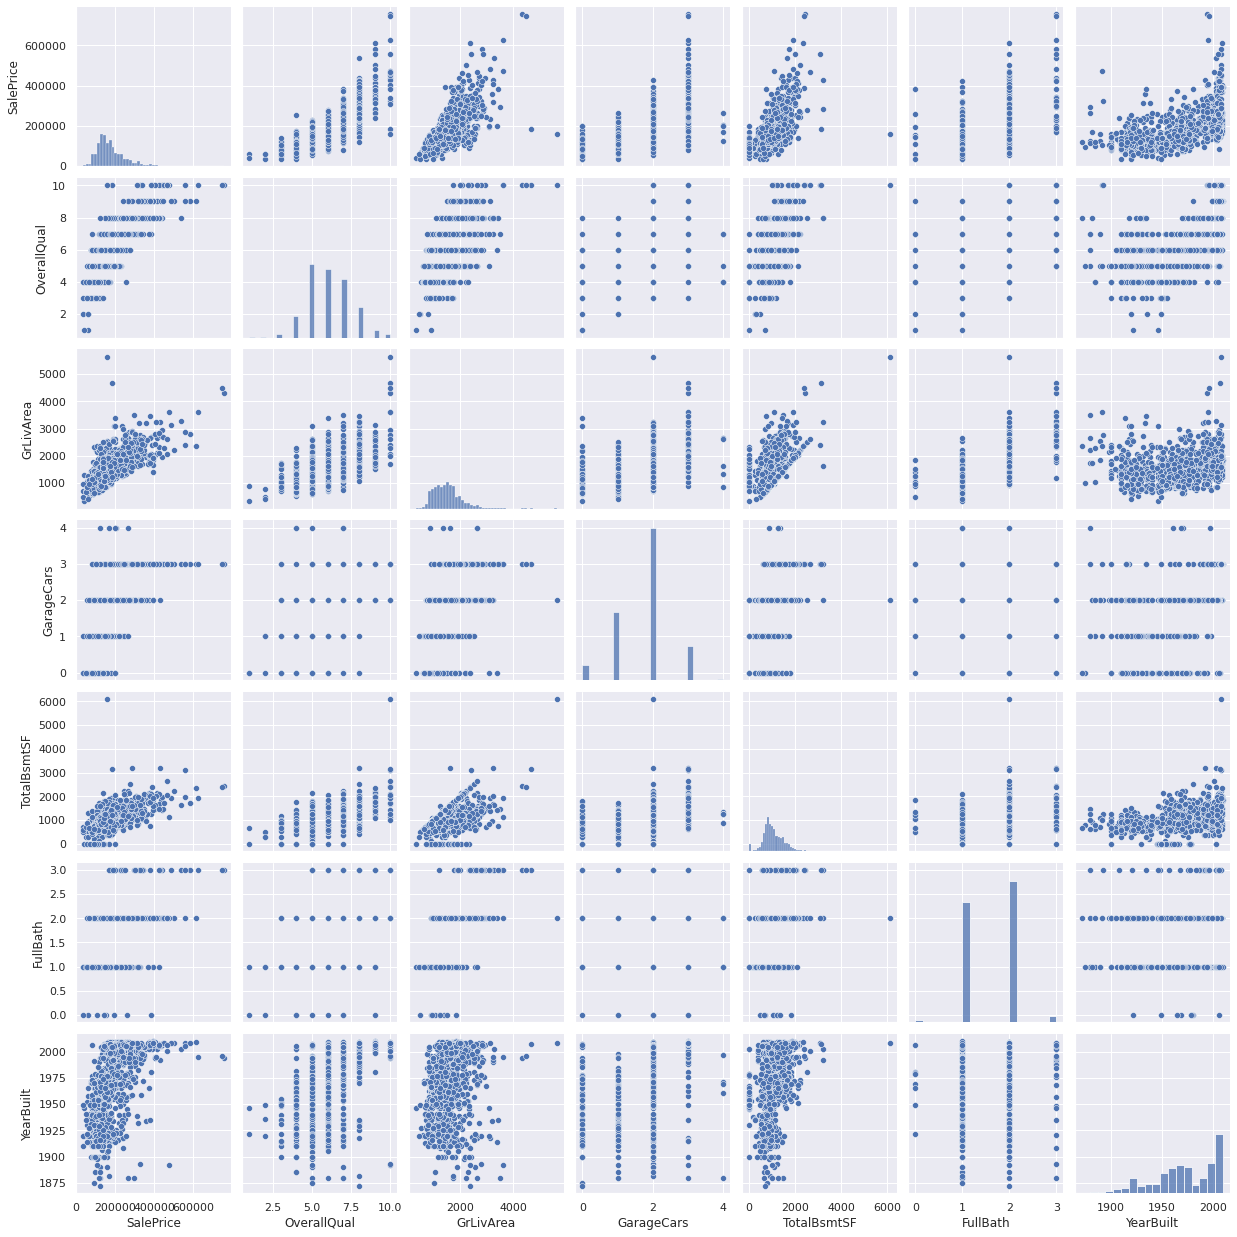

In [38]:
#scatterplot
# sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();